# kNN Classification (mglearn.datasets.make_forge())

X.shape: (26, 2)


/Users/anjaliadap/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


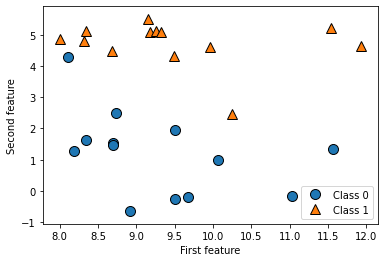

In [31]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

In [32]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/anjaliadap/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9)

In [34]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [35]:
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [36]:
print('Test set accuracy: {}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.8571428571428571


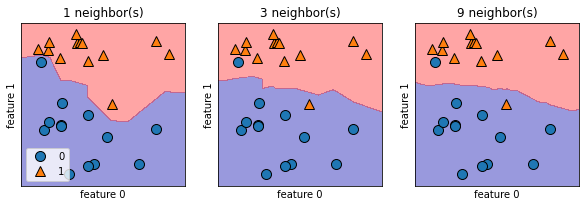

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend(loc=3)

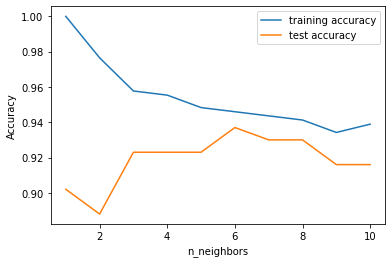

In [41]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()